In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import os
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy.stats import kurtosis, skew
import librosa.feature
from scipy import signal

bon pour resumer pour ne pas oublier, il y a 2 approches de modelisation:
1. Approche utilisant feature extractions: MLP, CNN, Transformer
- avec ca on peut faire SHAP value pour interpreter
2. Approche utilisant les donnees brutes: 
- 1D CNN on raw waveforms
- 2D CNN on Mel-Spectrograms 
- LSTMs on MFCCs

In [2]:
y_train = pd.read_csv("data/Y_train_ofTdMHi.csv")

# 1. EDA

## Analyze the target variable

In [3]:
y_train.head()

,id,pos_label
0,00000-JAM.wav,0.0
1,00001-JAM.wav,1.0
2,00002-JAM.wav,1.0
3,00003-JAM.wav,1.0
4,00004-JAM.wav,1.0


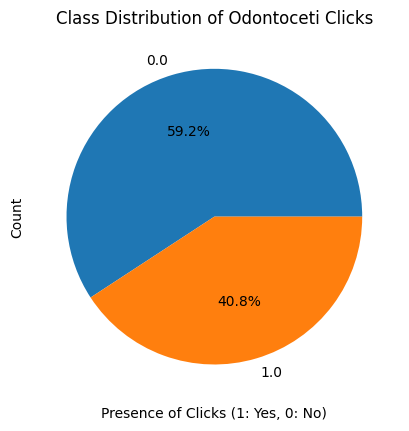

In [4]:
#Visualize the repartition of the target variable 
y_train['pos_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class Distribution of Odontoceti Clicks")
plt.xlabel("Presence of Clicks (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()


In [21]:
# Extract location information from file names
y_train["location"] = y_train["id"].apply(lambda x: x.split("-")[-1].split(".")[0])

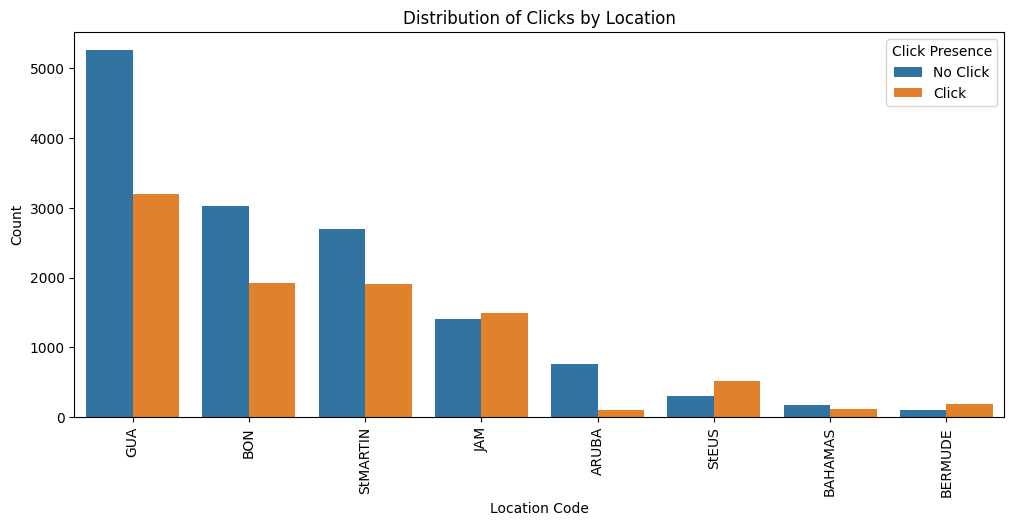

In [6]:
# Location-based distribution plot
plt.figure(figsize=(12, 5))
sns.countplot(x=y_train["location"], hue=y_train["pos_label"], order=y_train["location"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Clicks by Location")
plt.xlabel("Location Code")
plt.ylabel("Count")
plt.legend(title="Click Presence", labels=["No Click", "Click"])
plt.show()

Certain locations may have more odontoceti clicks, indicating regional differences in marine life activity.

## Audio Data Exploration

Nous allons prendre les même variables que le benchmark du challenge pour commencer

In [ ]:
# Chargement des données comme dans Extract Features

In [3]:
from scipy import signal
import librosa.feature as feat

# Charger les fichiers audio
audio_files = [os.path.join("data/X_train", f) for f in os.listdir("data/X_train") if f.endswith(".wav")]

audio_properties = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)  # Charger l'audio avec la fréquence d'échantillonnage originale

    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    y = signal.sosfiltfilt(sos, y)
    rms = feat.rms(y=y) 
    sc = feat.spectral_centroid(y=y, sr=sr)
    sb = feat.spectral_bandwidth(y=y,sr=sr)
    sf = feat.spectral_flatness(y=y)

    features = [file, np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
                np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
                np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
                np.mean(sf), np.std(sf), np.min(sf), np.max(sf)]
    
    audio_properties.append(features)

# Créer un DataFrame
columns = ["File","RMS Mean", "RMS Std", "RMS Min", "RMS Max",\
           "Spectral Centroid Mean", "Spectral Centroid Std", "Spectral Centroid Min", "Spectral Centroid Max",\
           "Spectral Bandwidth Mean", "Spectral Bandwidth Std", "Spectral Bandwidth Min", "Spectral Bandwidth Max",\
           "Spectral Flatness Mean", "Spectral Flatness Std", "Spectral Flatness Min", "Spectral Flatness Max"]

audio_df = pd.DataFrame(audio_properties, columns=columns)

KeyboardInterrupt: 

In [ ]:
# Charger les fichiers audio
audio_files = [os.path.join("data/X_test", f) for f in os.listdir("data/X_test") if f.endswith(".wav")]

audio_properties = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)  # Charger l'audio avec la fréquence d'échantillonnage originale

    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    y = signal.sosfiltfilt(sos, y)
    rms = feat.rms(y=y) 
    sc = feat.spectral_centroid(y=y, sr=sr)
    sb = feat.spectral_bandwidth(y=y,sr=sr)
    sf = feat.spectral_flatness(y=y)

    features = [file, np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
                np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
                np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
                np.mean(sf), np.std(sf), np.min(sf), np.max(sf)]
    
    audio_properties.append(features)

# Créer un DataFrame
columns = ["File","RMS Mean", "RMS Std", "RMS Min", "RMS Max",\
           "Spectral Centroid Mean", "Spectral Centroid Std", "Spectral Centroid Min", "Spectral Centroid Max",\
           "Spectral Bandwidth Mean", "Spectral Bandwidth Std", "Spectral Bandwidth Min", "Spectral Bandwidth Max",\
           "Spectral Flatness Mean", "Spectral Flatness Std", "Spectral Flatness Min", "Spectral Flatness Max"]

audio_df_test = pd.DataFrame(audio_properties, columns=columns)

In [10]:
# Charger les fichiers audio
audio_files = [os.path.join("data/X_train", f) for f in os.listdir("data/X_train") if f.endswith(".wav")]

audio_properties = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)  # Charger l'audio avec la fréquence d'échantillonnage originale
    duration = len(y) / sr
    
    # Appliquer un filtre passe-bande entre 5000 Hz et 100000 Hz
    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    y = signal.sosfiltfilt(sos, y)
    
    # Amplitude (statistiques)
    amp_mean, amp_std, amp_min, amp_max = np.mean(y), np.std(y), np.min(y), np.max(y)

    # Puissance RMS
    rms = librosa.feature.rms(y=y)
    rms_mean, rms_std, rms_min, rms_max = np.mean(rms), np.std(rms), np.min(rms), np.max(rms)

    # Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    centroid_mean, centroid_std, centroid_min, centroid_max = np.mean(centroid), np.std(centroid), np.min(centroid), np.max(centroid)

    # Spectral Bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    bandwidth_mean, bandwidth_std, bandwidth_min, bandwidth_max = np.mean(bandwidth), np.std(bandwidth), np.min(bandwidth), np.max(bandwidth)

    # Spectral Flatness
    flatness = librosa.feature.spectral_flatness(y=y)
    flatness_mean, flatness_std, flatness_min, flatness_max = np.mean(flatness), np.std(flatness), np.min(flatness), np.max(flatness)

    # FFT pour trouver la fréquence de pic
    D = np.abs(librosa.stft(y))
    freqs = librosa.fft_frequencies(sr=sr)
    peak_freq = freqs[np.argmax(np.mean(D, axis=1))]

    # Inter-Click Interval (ICI)
    onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)
    ici_values = np.diff(onset_times)
    mean_ici = np.mean(ici_values) if len(ici_values) > 0 else 0

    # Signal-to-Noise Ratio (SNR)
    signal_power = np.mean(y**2)
    noise_power = np.var(y)
    snr = 10 * np.log10(signal_power / noise_power)

    # Kurtosis & Skewness du spectre
    spec = np.abs(librosa.stft(y))
    spec_mean = np.mean(spec, axis=1)
    kurt = kurtosis(spec_mean)
    skewness = skew(spec_mean)

    # Stocker les propriétés
    audio_properties.append([
        file, sr, duration, peak_freq, mean_ici, snr, kurt, skewness,
        amp_mean, amp_std, amp_min, amp_max,
        rms_mean, rms_std, rms_min, rms_max,
        centroid_mean, centroid_std, centroid_min, centroid_max,
        bandwidth_mean, bandwidth_std, bandwidth_min, bandwidth_max,
        flatness_mean, flatness_std, flatness_min, flatness_max
    ])

# Créer un DataFrame
columns = [
    "File", "Sampling Rate (Hz)", "Duration (s)", "Peak Frequency", "Mean ICI (s)", "SNR (dB)", "Kurtosis", "Skewness",
    "Amplitude Mean", "Amplitude Std", "Amplitude Min", "Amplitude Max",
    "RMS Mean", "RMS Std", "RMS Min", "RMS Max",
    "Spectral Centroid Mean", "Spectral Centroid Std", "Spectral Centroid Min", "Spectral Centroid Max",
    "Spectral Bandwidth Mean", "Spectral Bandwidth Std", "Spectral Bandwidth Min", "Spectral Bandwidth Max",
    "Spectral Flatness Mean", "Spectral Flatness Std", "Spectral Flatness Min", "Spectral Flatness Max"
]

audio_df = pd.DataFrame(audio_properties, columns=columns)

KeyboardInterrupt: 

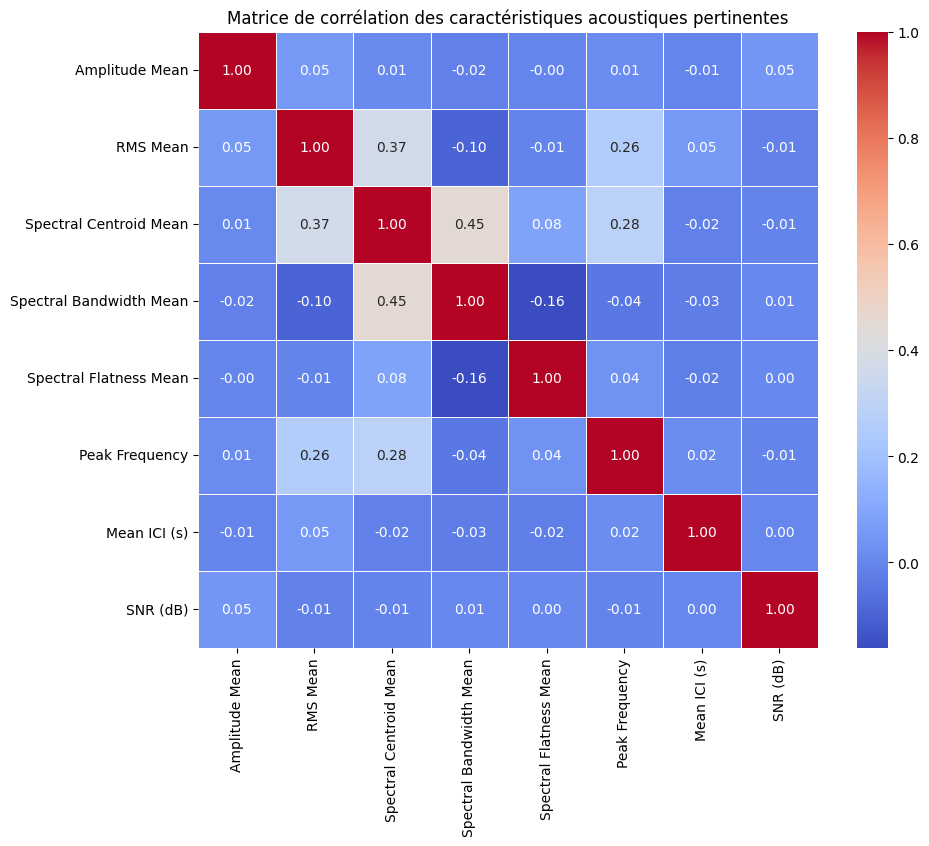

In [10]:
# On garde que les mean pour l'analyse car sinon trop de répétition
selected_features = [
    "Amplitude Mean", "RMS Mean", "Spectral Centroid Mean", 
    "Spectral Bandwidth Mean", "Spectral Flatness Mean", "Peak Frequency",
    "Mean ICI (s)", "SNR (dB)"
]


corr_matrix = audio_df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des caractéristiques acoustiques pertinentes")
plt.show()


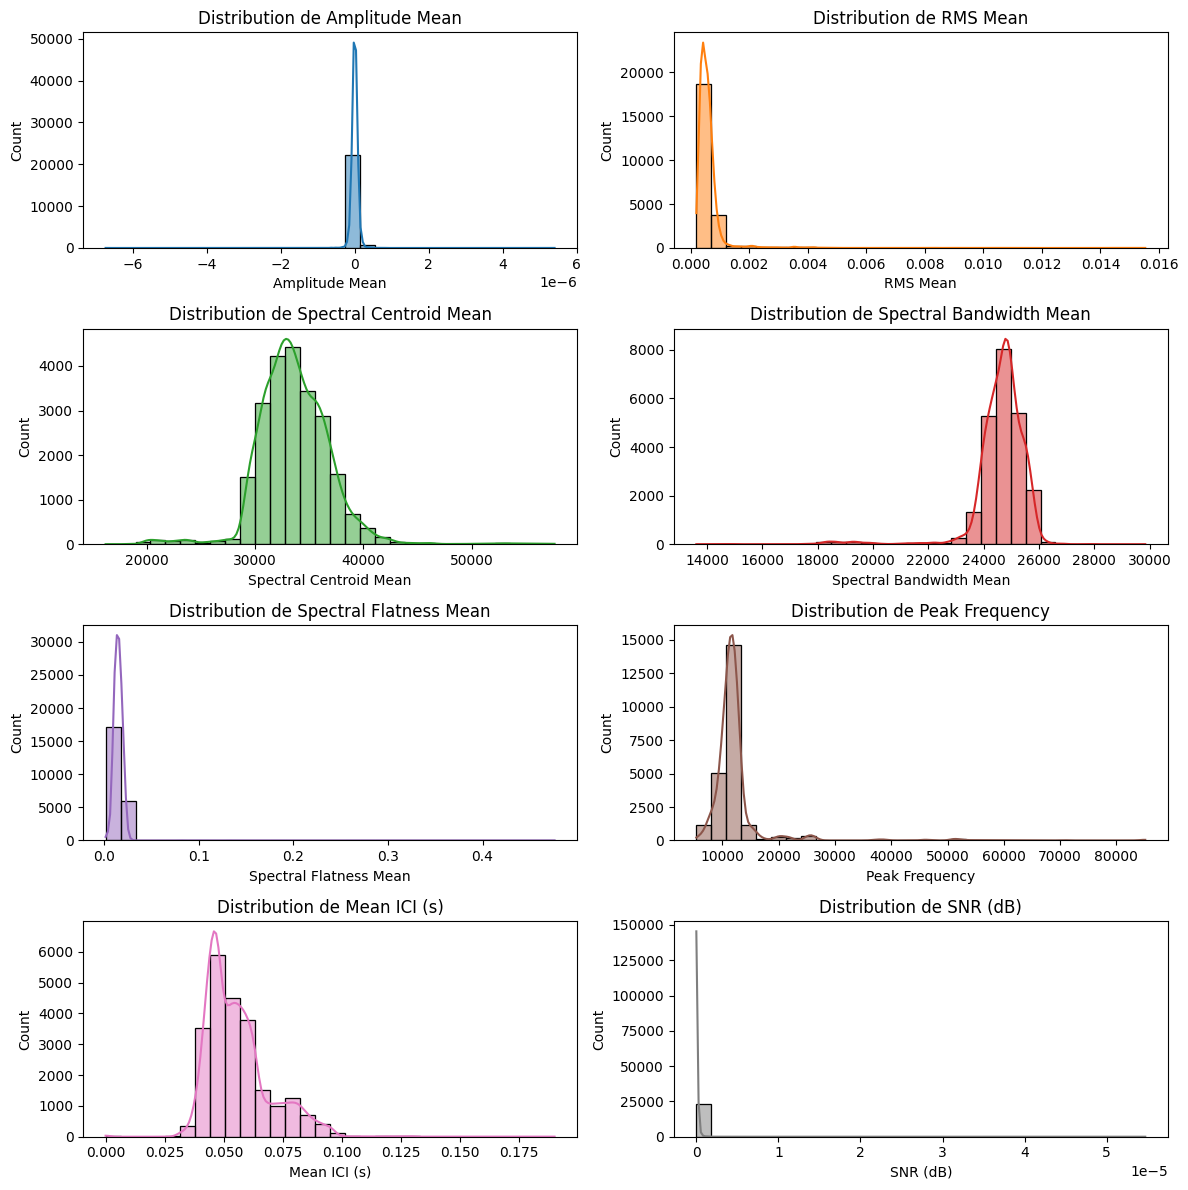

In [11]:
feature_pairs_mean = [
    ("Amplitude Mean", "RMS Mean"),
    ("Spectral Centroid Mean", "Spectral Bandwidth Mean"),
    ("Spectral Flatness Mean", "Peak Frequency"),
    ("Mean ICI (s)", "SNR (dB)")
]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Boucle 
for i, (feature1, feature2) in enumerate(feature_pairs_mean):
    sns.histplot(audio_df[feature1], kde=True, bins=30, color=colors[2*i], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution de {feature1}")

    sns.histplot(audio_df[feature2], kde=True, bins=30, color=colors[2*i+1], ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribution de {feature2}")

plt.tight_layout()
plt.show()


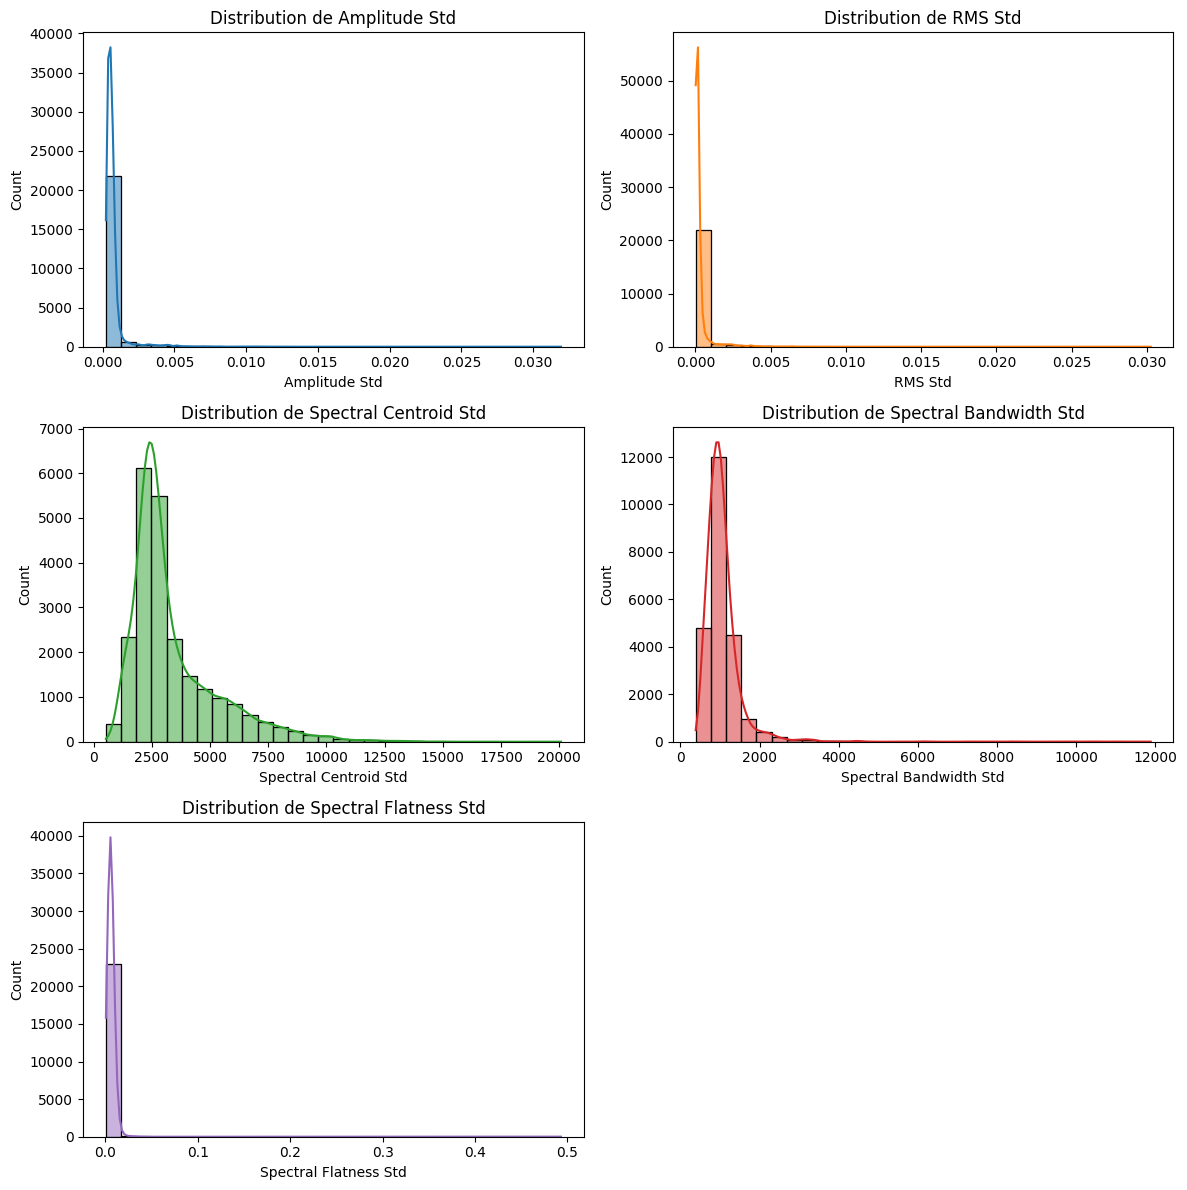

In [12]:
feature_pairs_std = [
    ("Amplitude Std", "RMS Std"),
    ("Spectral Centroid Std", "Spectral Bandwidth Std"),
    ("Spectral Flatness Std",)  
]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Boucle pour afficher les histogrammes
for i, feature_pair in enumerate(feature_pairs_std):
    if len(feature_pair) == 2: 
        feature1, feature2 = feature_pair
        sns.histplot(audio_df[feature1], kde=True, bins=30, color=colors[2*i], ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribution de {feature1}")
        sns.histplot(audio_df[feature2], kde=True, bins=30, color=colors[2*i+1], ax=axes[i, 1])
        axes[i, 1].set_title(f"Distribution de {feature2}")
    else:  
        feature1 = feature_pair[0]
        sns.histplot(audio_df[feature1], kde=True, bins=30, color=colors[2*i], ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribution de {feature1}")
        axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


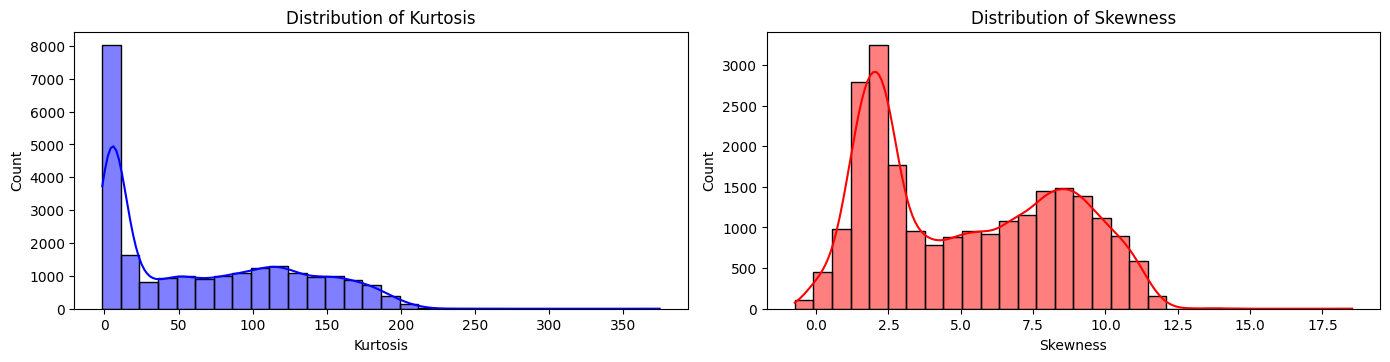

In [13]:
# Kurtosis et Skewness
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(audio_df["Kurtosis"], bins=30, kde=True, color="blue")
plt.xlabel("Kurtosis")
plt.ylabel("Count")
plt.title("Distribution of Kurtosis")

plt.subplot(3, 2, 2)
sns.histplot(audio_df["Skewness"], bins=30, kde=True, color="red")
plt.xlabel("Skewness")
plt.ylabel("Count")
plt.title("Distribution of Skewness")

plt.tight_layout()
plt.show()

In [ ]:
# On va récupérer la target de la dataframe y_train
audio_df["File"] = audio_df["File"].str.replace(r"^X_train\\", "", regex=True)
audio_data = pd.merge(audio_df, y_train, left_on='File', right_on='id', how='inner')

In [ ]:
#export to csv
audio_data.to_csv("data/X_train.csv", index=False)
audio_data =pd.read_csv("data/X_train.csv") 

In [ ]:
# Same treatment for the test data
audio_df_test["File"] = audio_df_test["File"].str.replace(r"^data/X_test\\", "", regex=True)


In [ ]:
#export to csv
audio_df_test.to_csv("data/X_soumettre.csv", index=False)
audio_df_test =pd.read_csv("data/X_soumettre.csv") 

In [15]:
audio_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sampling Rate (Hz),23168.0,2.560000e+05,0.000000e+00,2.560000e+05,2.560000e+05,2.560000e+05,2.560000e+05,256000.000000
Duration (s),23168.0,2.000000e-01,0.000000e+00,2.000000e-01,2.000000e-01,2.000000e-01,2.000000e-01,0.200000
Peak Frequency,23168.0,1.240984e+04,6.098091e+03,5.375000e+03,1.062500e+04,1.150000e+04,1.250000e+04,85125.000000
Mean ICI (s),23168.0,5.598574e-02,1.401548e-02,0.000000e+00,4.600000e-02,5.300000e-02,6.200000e-02,0.190000
SNR (dB),23168.0,9.478965e-08,6.391518e-07,9.643275e-16,5.359928e-09,2.907594e-08,9.346443e-08,0.000055
Kurtosis,23168.0,6.595930e+01,6.200158e+01,-1.503280e+00,6.874370e+00,5.026865e+01,1.182316e+02,374.468486
Skewness,23168.0,5.174882e+00,3.286132e+00,-7.404343e-01,2.149902e+00,4.782926e+00,8.179071e+00,18.529687
Amplitude Mean,23168.0,7.223526e-10,1.295339e-07,-6.740153e-06,-4.526268e-08,2.868616e-10,4.550048e-08,0.000005
Amplitude Std,23168.0,7.247572e-04,9.448859e-04,2.261409e-04,3.951530e-04,5.526882e-04,7.151943e-04,0.031933
Amplitude Min,23168.0,-2.664208e-02,5.041453e-02,-8.314882e-01,-2.424825e-02,-1.394995e-02,-7.532914e-03,-0.001128


In [16]:
audio_data.columns

Index(['File', 'Sampling Rate (Hz)', 'Duration (s)', 'Peak Frequency',
       'Mean ICI (s)', 'SNR (dB)', 'Kurtosis', 'Skewness', 'Amplitude Mean',
       'Amplitude Std', 'Amplitude Min', 'Amplitude Max', 'RMS Mean',
       'RMS Std', 'RMS Min', 'RMS Max', 'Spectral Centroid Mean',
       'Spectral Centroid Std', 'Spectral Centroid Min',
       'Spectral Centroid Max', 'Spectral Bandwidth Mean',
       'Spectral Bandwidth Std', 'Spectral Bandwidth Min',
       'Spectral Bandwidth Max', 'Spectral Flatness Mean',
       'Spectral Flatness Std', 'Spectral Flatness Min',
       'Spectral Flatness Max', 'id', 'pos_label', 'location'],
      dtype='object')

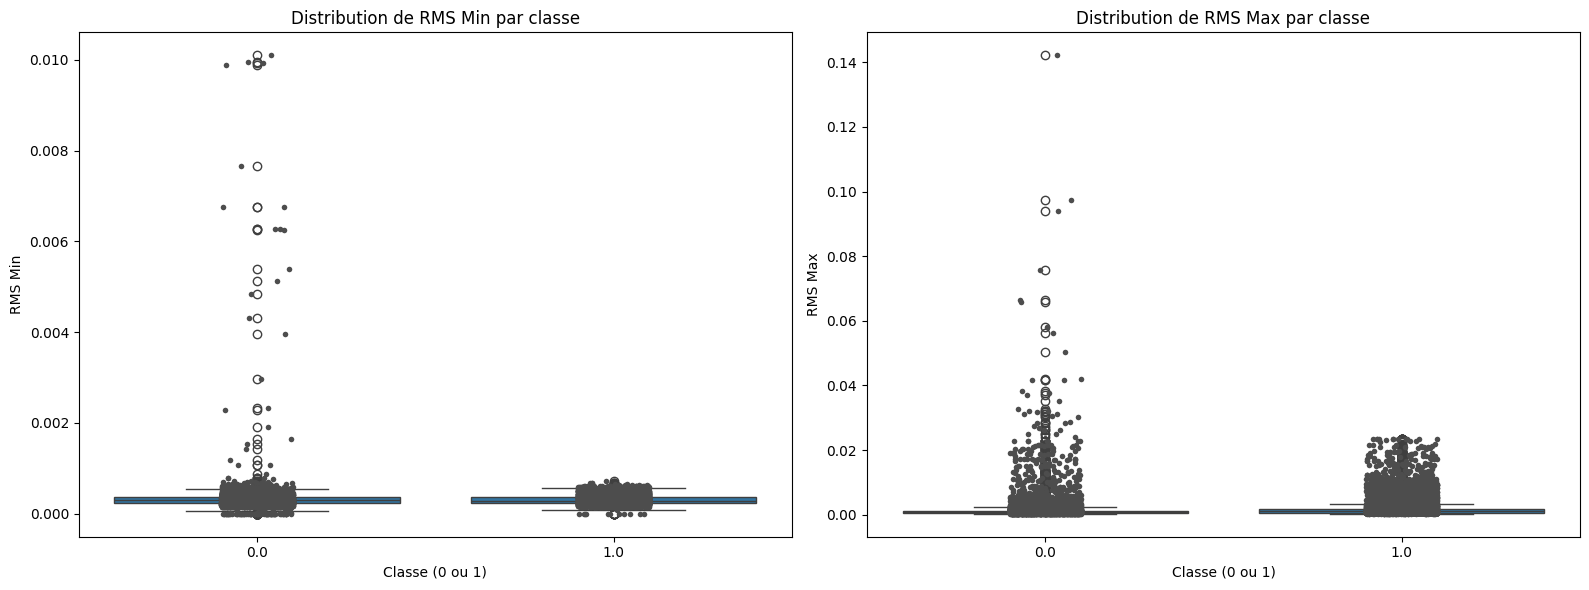


Statistiques pour RMS Min:
             count      mean       std  min       25%       50%       75%  \
pos_label                                                                   
0.0        13718.0  0.000314  0.000248  0.0  0.000241  0.000300  0.000360   
1.0         9450.0  0.000307  0.000095  0.0  0.000239  0.000278  0.000368   

                max  
pos_label            
0.0        0.010099  
1.0        0.000722  

Statistiques pour RMS Max:
             count      mean       std       min       25%       50%  \
pos_label                                                              
0.0        13718.0  0.001297  0.002995  0.000276  0.000566  0.000876   
1.0         9450.0  0.001971  0.002749  0.000304  0.000654  0.001099   

                75%       max  
pos_label                      
0.0        0.001236  0.142205  
1.0        0.001754  0.023511  


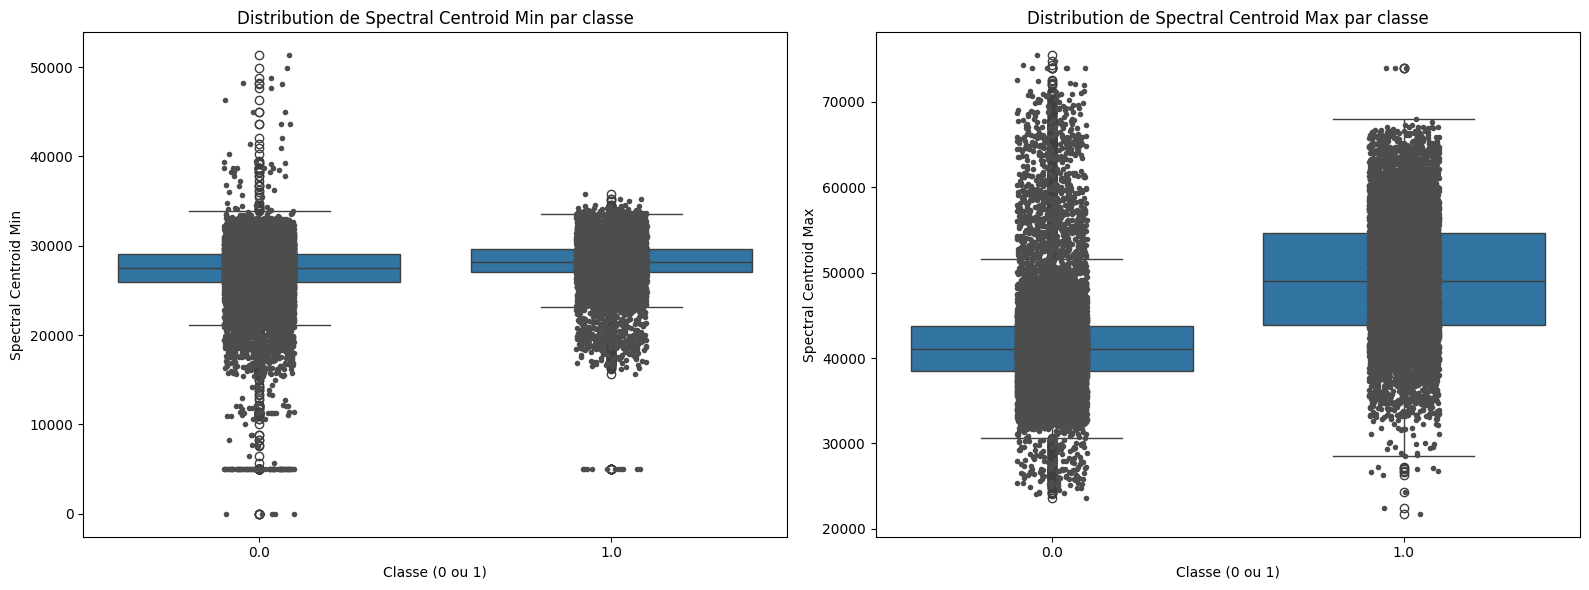


Statistiques pour Spectral Centroid Min:
             count          mean          std            min           25%  \
pos_label                                                                    
0.0        13718.0  27085.853133  3440.497315  6.958080e-315  25908.581989   
1.0         9450.0  28082.583572  2661.194765   4.963286e+03  27058.360839   

                    50%           75%           max  
pos_label                                            
0.0        27535.523342  29108.592945  51322.991206  
1.0        28215.229422  29669.588623  35807.768646  

Statistiques pour Spectral Centroid Max:
             count          mean          std           min           25%  \
pos_label                                                                   
0.0        13718.0  41706.120199  5991.121602  23642.572877  38494.514556   
1.0         9450.0  49332.175453  7298.110621  21768.720365  43850.419157   

                    50%           75%           max  
pos_label               

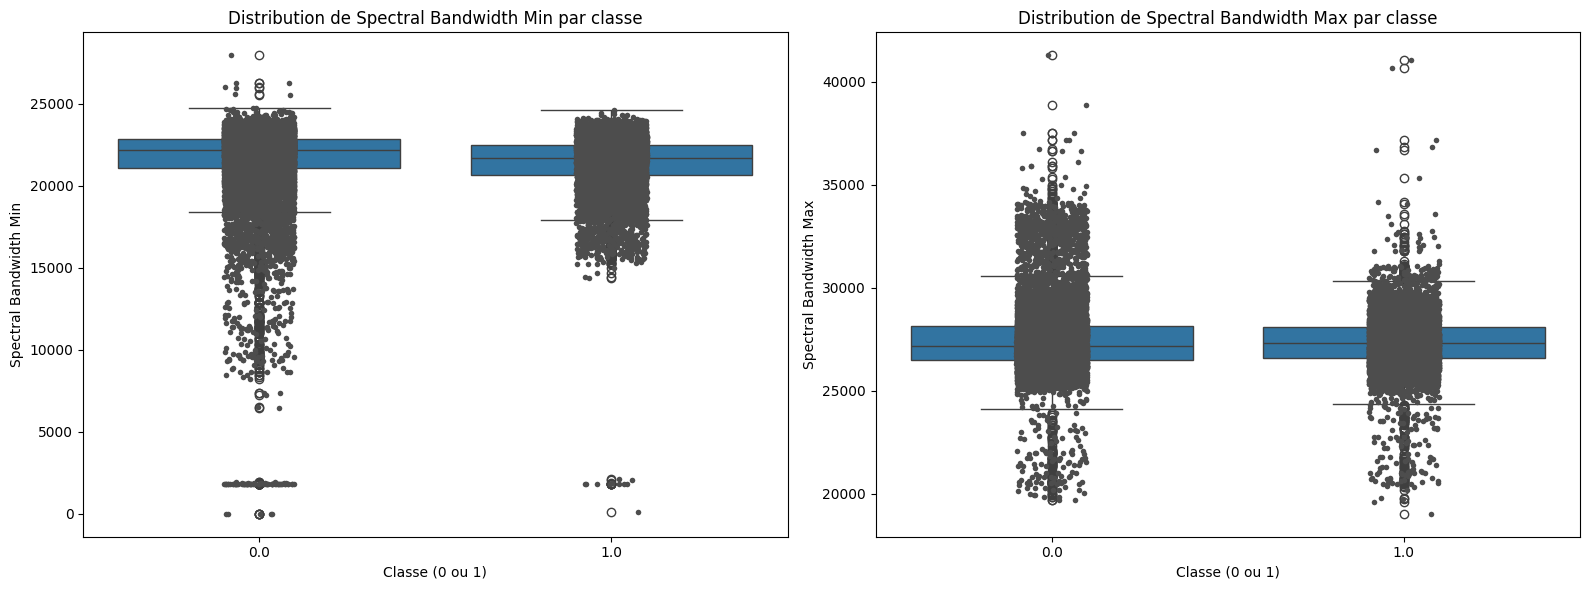


Statistiques pour Spectral Bandwidth Min:
             count          mean          std            min           25%  \
pos_label                                                                    
0.0        13718.0  21529.134336  2445.152661  2.562519e-155  21051.332114   
1.0         9450.0  21361.290816  1687.879336   8.838922e+01  20650.311320   

                    50%           75%           max  
pos_label                                            
0.0        22149.955574  22819.240162  27949.877710  
1.0        21693.153934  22466.816645  24635.340084  

Statistiques pour Spectral Bandwidth Max:
             count          mean          std           min           25%  \
pos_label                                                                   
0.0        13718.0  27494.728006  1692.125523  19686.817316  26498.171958   
1.0         9450.0  27319.132664  1290.533851  19019.190762  26559.485364   

                    50%           75%           max  
pos_label             

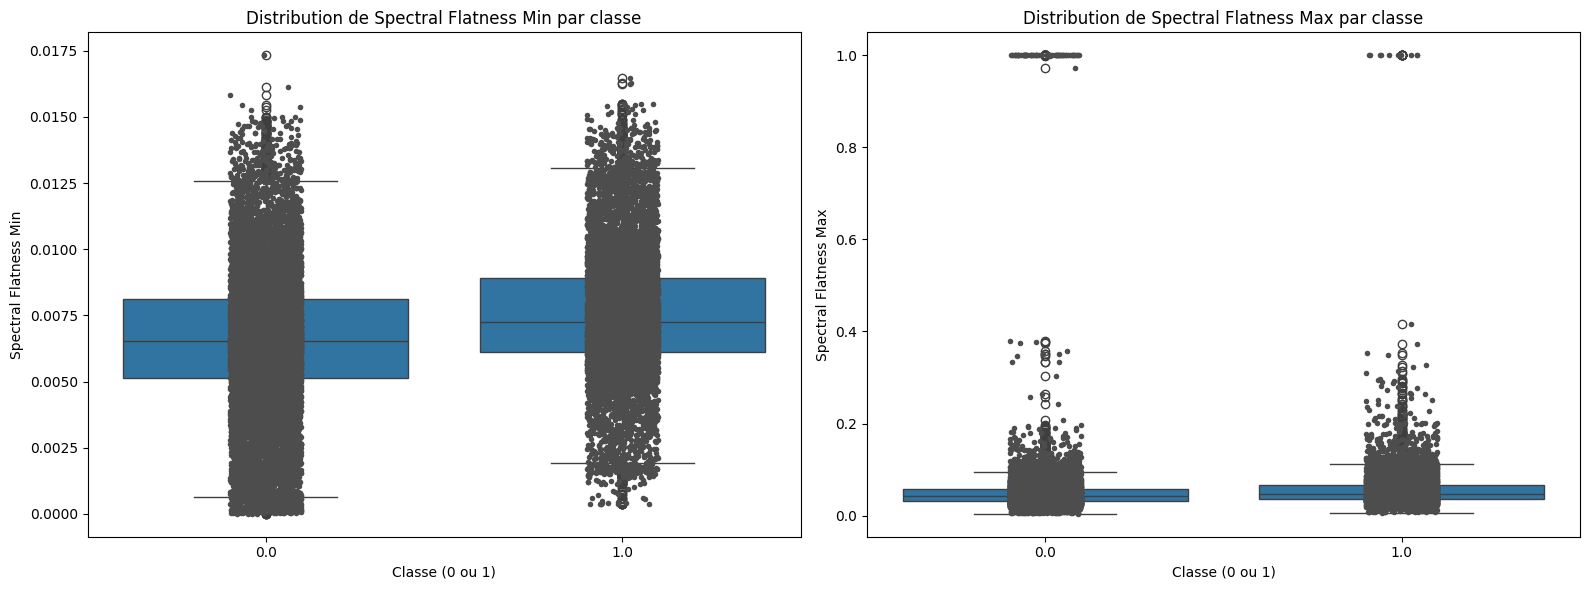


Statistiques pour Spectral Flatness Min:
             count      mean       std       min       25%       50%  \
pos_label                                                              
0.0        13718.0  0.006468  0.002729  0.000005  0.005121  0.006547   
1.0         9450.0  0.007547  0.002481  0.000371  0.006115  0.007233   

                75%       max  
pos_label                      
0.0        0.008114  0.017329  
1.0        0.008903  0.016480  

Statistiques pour Spectral Flatness Max:
             count      mean       std       min       25%       50%  \
pos_label                                                              
0.0        13718.0  0.051687  0.073083  0.003843  0.031505  0.042338   
1.0         9450.0  0.055969  0.044089  0.005378  0.035310  0.047563   

                75%  max  
pos_label                 
0.0        0.056793  1.0  
1.0        0.066440  1.0  


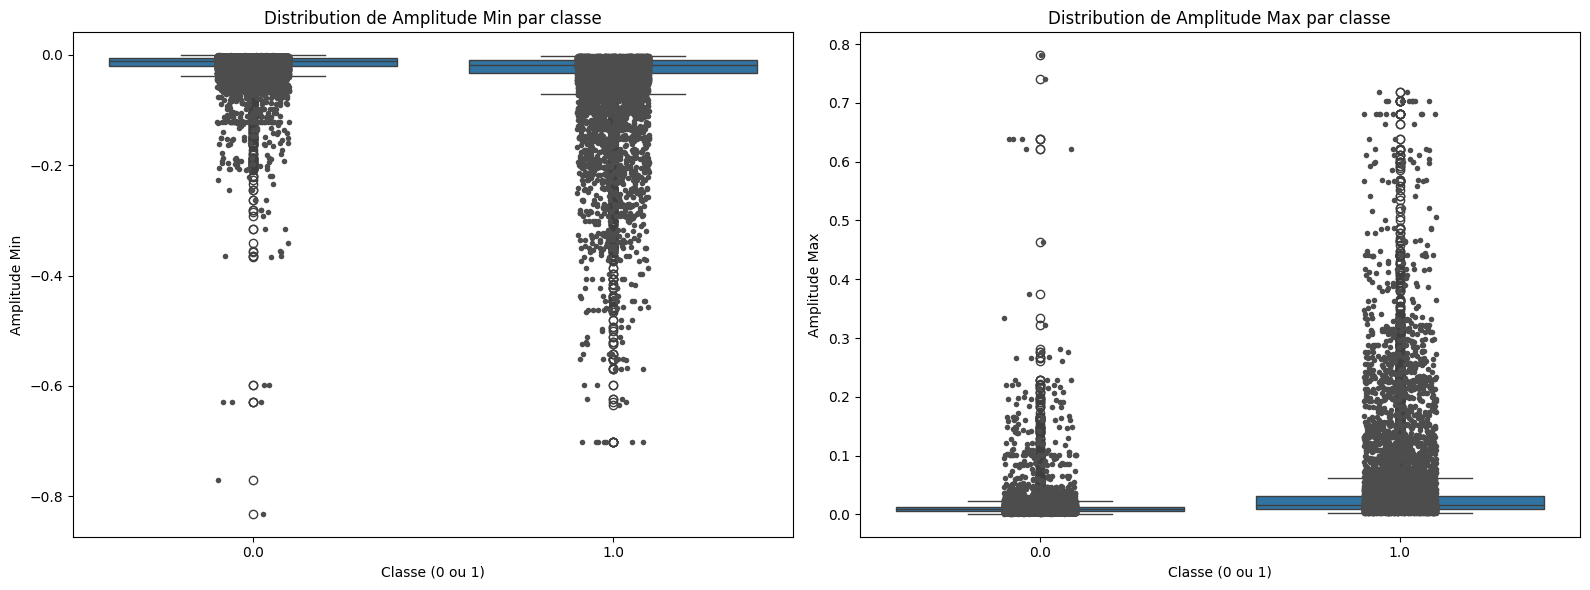


Statistiques pour Amplitude Min:
             count      mean       std       min       25%       50%  \
pos_label                                                              
0.0        13718.0 -0.017064  0.025626 -0.831488 -0.019784 -0.012066   
1.0         9450.0 -0.040547  0.070368 -0.700993 -0.034012 -0.017886   

                75%       max  
pos_label                      
0.0       -0.006666 -0.001128  
1.0       -0.008939 -0.001788  

Statistiques pour Amplitude Max:
             count      mean       std       min       25%       50%  \
pos_label                                                              
0.0        13718.0  0.011330  0.022266  0.001036  0.005524  0.008735   
1.0         9450.0  0.041012  0.078909  0.001774  0.008964  0.015498   

                75%       max  
pos_label                      
0.0        0.012284  0.780934  
1.0        0.030525  0.717707  


In [17]:
features_min_max = [
    ("RMS Min", "RMS Max"),
    ("Spectral Centroid Min", "Spectral Centroid Max"),
    ("Spectral Bandwidth Min", "Spectral Bandwidth Max"),
    ("Spectral Flatness Min", "Spectral Flatness Max"),
    ("Amplitude Min", "Amplitude Max")
]

# Sous-graphiques pour chaque paire de caractéristiques
for feature_min, feature_max in features_min_max:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Distribution de Min par pos_label
    sns.boxplot(x='pos_label', y=feature_min, data=audio_data, ax=axes[0])
    sns.stripplot(x='pos_label', y=feature_min, data=audio_data, 
                  size=4, color='.3', linewidth=0, ax=axes[0])
    axes[0].set_title(f'Distribution de {feature_min} par classe')
    axes[0].set_xlabel('Classe (0 ou 1)')
    axes[0].set_ylabel(feature_min)

    # Distribution de Max par pos_label
    sns.boxplot(x='pos_label', y=feature_max, data=audio_data, ax=axes[1])
    sns.stripplot(x='pos_label', y=feature_max, data=audio_data, 
                  size=4, color='.3', linewidth=0, ax=axes[1])
    axes[1].set_title(f'Distribution de {feature_max} par classe')
    axes[1].set_xlabel('Classe (0 ou 1)')
    axes[1].set_ylabel(feature_max)

    plt.tight_layout()
    plt.show()

    # Statistiques descriptives pour chaque variable
    print(f"\nStatistiques pour {feature_min}:")
    print(audio_data.groupby('pos_label')[feature_min].describe())
    print(f"\nStatistiques pour {feature_max}:")
    print(audio_data.groupby('pos_label')[feature_max].describe())


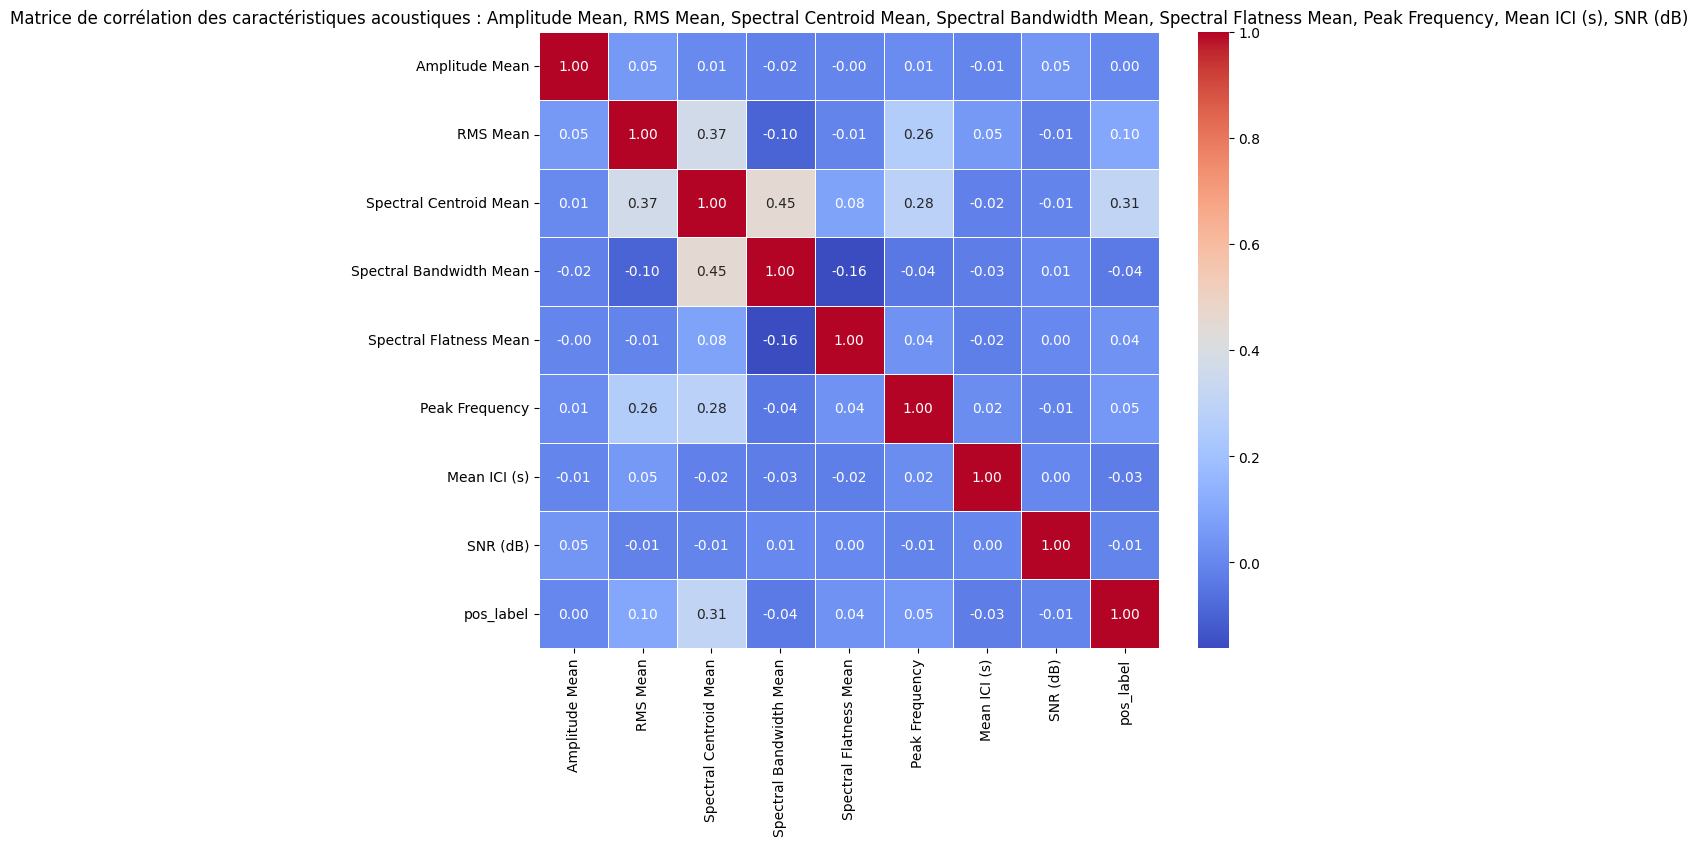

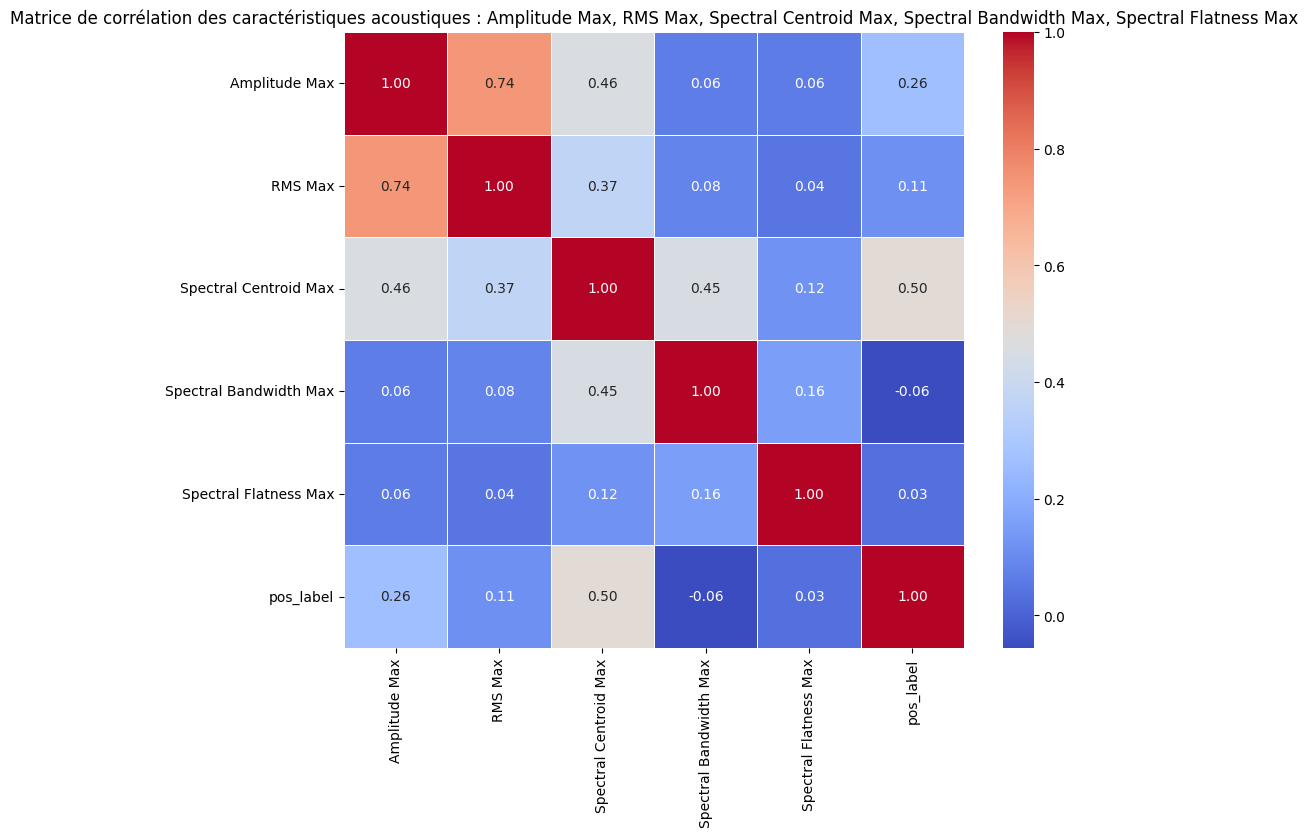

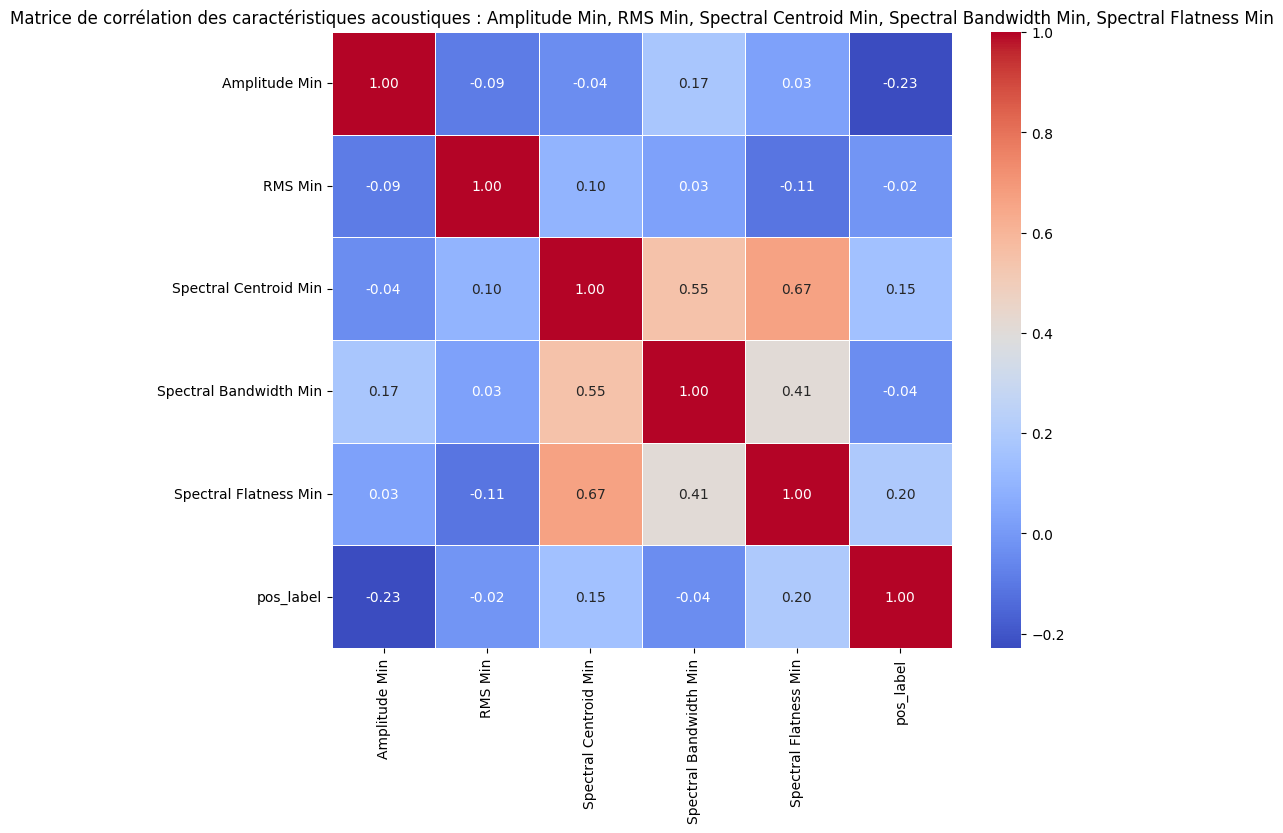

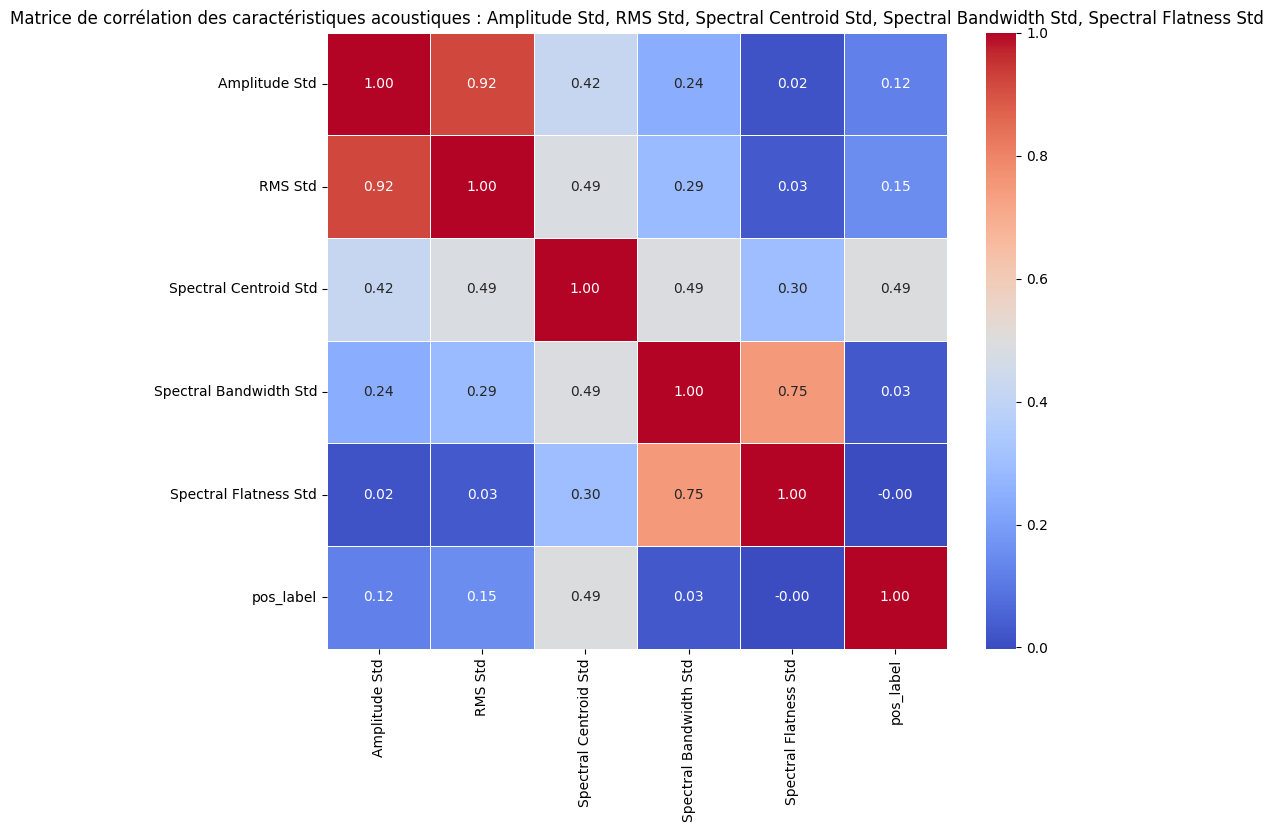

In [18]:
# Sélectionner les caractéristiques à analyser
selected_features_mean = [
    "Amplitude Mean", "RMS Mean", "Spectral Centroid Mean", 
    "Spectral Bandwidth Mean", "Spectral Flatness Mean", "Peak Frequency",
    "Mean ICI (s)", "SNR (dB)", "pos_label"
]

selected_features_max = [
    "Amplitude Max", "RMS Max", "Spectral Centroid Max", 
    "Spectral Bandwidth Max", "Spectral Flatness Max", "pos_label"
]

selected_features_min = [
    "Amplitude Min", "RMS Min", "Spectral Centroid Min", 
    "Spectral Bandwidth Min", "Spectral Flatness Min", "pos_label"
]

selected_features_std = [
    "Amplitude Std", "RMS Std", "Spectral Centroid Std", 
    "Spectral Bandwidth Std", "Spectral Flatness Std", "pos_label"
]

# Matrice de corrélation pour chaque groupe
features_list = [selected_features_mean, selected_features_max, selected_features_min, selected_features_std]

for selected_features in features_list:
    corr_matrix = audio_data[selected_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(f"Matrice de corrélation des caractéristiques acoustiques : {', '.join(selected_features[:-1])}")
    plt.show()


In [ ]:
#Crash test

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, accuracy_score, f1_score, classification_report, precision_score, recall_score


In [53]:
audio_data.head()

,File,RMS Mean,RMS Std,RMS Min,RMS Max,Spectral Centroid Mean,Spectral Centroid Std,Spectral Centroid Min,Spectral Centroid Max,Spectral Bandwidth Mean,Spectral Bandwidth Std,Spectral Bandwidth Min,Spectral Bandwidth Max,Spectral Flatness Mean,Spectral Flatness Std,Spectral Flatness Min,Spectral Flatness Max,id,pos_label,location
0,00000-JAM.wav,0.000306,0.000067,0.000188,0.000488,33091.410037,1476.154209,29273.938993,36801.024729,24774.591555,795.562058,21782.369512,26305.819243,0.019416,0.006762,0.009422,0.073818,00000-JAM.wav,0.0,JAM
1,00001-JAM.wav,0.000336,0.000125,0.000168,0.000886,34378.653061,2948.158021,28935.108670,45693.603144,25242.833502,1002.853259,23035.653604,27829.674762,0.021222,0.007939,0.010541,0.072316,00001-JAM.wav,1.0,JAM
2,00002-JAM.wav,0.000350,0.000163,0.000161,0.000915,34593.831292,3156.256999,30212.095058,45775.249244,25244.598160,853.897949,23186.677123,27835.712913,0.021065,0.006066,0.011405,0.062272,00002-JAM.wav,1.0,JAM
3,00003-JAM.wav,0.000337,0.000167,0.000192,0.000913,33997.637783,2981.682012,29700.957887,45682.357907,25053.251604,730.607384,23142.031762,27296.109279,0.021077,0.009550,0.011300,0.075097,00003-JAM.wav,1.0,JAM
4,00004-JAM.wav,0.000337,0.000166,0.000179,0.000916,33516.397186,3011.175454,28609.695118,45784.247882,24855.740606,638.327786,22298.196021,26234.226162,0.019088,0.003976,0.008999,0.036834,00004-JAM.wav,1.0,JAM


# 1. On garde seulement les colonnes pertinentes
features = [
    "Amplitude Mean", "Amplitude Std", "Amplitude Min", "Amplitude Max",
    "RMS Mean", "RMS Std", "RMS Min", "RMS Max",
    "Spectral Centroid Mean", "Spectral Centroid Std", "Spectral Centroid Min", 
    "Spectral Centroid Max", "Spectral Bandwidth Mean", "Spectral Bandwidth Std", 
    "Spectral Bandwidth Min", "Spectral Bandwidth Max", "Spectral Flatness Mean", 
    "Spectral Flatness Std", "Spectral Flatness Min", "Spectral Flatness Max"
]

In [4]:
audio_df_test =pd.read_csv("data/X_soumettre.csv") 
audio_data =pd.read_csv("data/X_train.csv") 

In [11]:
features = [
    "RMS Mean", "RMS Std", "RMS Min", "RMS Max",
    "Spectral Centroid Mean", "Spectral Centroid Std", "Spectral Centroid Min", 
    "Spectral Centroid Max", "Spectral Bandwidth Mean", "Spectral Bandwidth Std", 
    "Spectral Bandwidth Min", "Spectral Bandwidth Max", "Spectral Flatness Mean", 
    "Spectral Flatness Std", "Spectral Flatness Min", "Spectral Flatness Max"
]


# Sélectionner les features et la cible
X = audio_data[features]
y = audio_data['pos_label']

# 2. Diviser les données en ensemble d'entraînement (70%) et validation (15%) et test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 3. Scaling des données (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Define and train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                    batch_size=32, learning_rate_init=0.001, max_iter=500, random_state=42)

mlp.fit(X_train_scaled, y_train)

# Predict probabilities on validation set
y_valid_proba = mlp.predict_proba(X_valid_scaled)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_valid, y_valid_proba)

print(f'Validation ROC AUC: {roc_auc:.4f}')


Validation ROC AUC: 0.9796


In [24]:
# Predict probabilities on test set
y_test_proba = mlp.predict_proba(X_test_scaled)[:, 1]

# Compute final test ROC AUC score
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f'Test ROC AUC: {test_roc_auc:.4f}')


Test ROC AUC: 0.9771


In [25]:
#Apply on new data
X_soumettre = audio_df_test[features]
X_soumettre_scaled = scaler.transform(X_soumettre)

# Predict probabilities on new data
y_soumettre_proba = mlp.predict_proba(X_soumettre_scaled)[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame({'id': audio_df_test['File'], 'pos_label': y_soumettre_proba})
submission.to_csv('data/submission.csv', index=False)

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_valid_tensor = torch.tensor(X_valid_scaled, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define MLP Model
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)  # Reduced neurons
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout added
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
# Initialize model
input_dim = X_train_scaled.shape[1]
model = MLPClassifier(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs=30, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    best_valid_loss = float('inf')  # Initialize best_valid_loss
    patience_counter = 0  # Initialize patience counter

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in valid_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                valid_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss/len(train_loader):.4f} - Valid Loss: {valid_loss/len(valid_loader):.4f}")

        # Early Stopping
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

train_model(model, train_loader, valid_loader, criterion, optimizer)

# Evaluate on test set
model.eval()
y_test_pred = model(X_test_tensor).detach().numpy().flatten()
y_test_true = y_test_tensor.numpy().flatten()
roc_auc = roc_auc_score(y_test_true, y_test_pred)
print(f"Test ROC AUC: {roc_auc:.4f}")


Epoch 1/30 - Train Loss: 0.5150 - Valid Loss: 0.3991
Epoch 2/30 - Train Loss: 0.4091 - Valid Loss: 0.3668
Epoch 3/30 - Train Loss: 0.3896 - Valid Loss: 0.3551
Epoch 4/30 - Train Loss: 0.3793 - Valid Loss: 0.3485
Epoch 5/30 - Train Loss: 0.3754 - Valid Loss: 0.3438
Epoch 6/30 - Train Loss: 0.3681 - Valid Loss: 0.3402
Epoch 7/30 - Train Loss: 0.3660 - Valid Loss: 0.3367
Epoch 8/30 - Train Loss: 0.3628 - Valid Loss: 0.3352
Epoch 9/30 - Train Loss: 0.3631 - Valid Loss: 0.3332
Epoch 10/30 - Train Loss: 0.3654 - Valid Loss: 0.3329
Epoch 11/30 - Train Loss: 0.3645 - Valid Loss: 0.3305
Epoch 12/30 - Train Loss: 0.3645 - Valid Loss: 0.3299
Epoch 13/30 - Train Loss: 0.3601 - Valid Loss: 0.3290
Epoch 14/30 - Train Loss: 0.3615 - Valid Loss: 0.3283
Epoch 15/30 - Train Loss: 0.3569 - Valid Loss: 0.3268
Epoch 16/30 - Train Loss: 0.3590 - Valid Loss: 0.3264
Epoch 17/30 - Train Loss: 0.3541 - Valid Loss: 0.3268
Epoch 18/30 - Train Loss: 0.3561 - Valid Loss: 0.3244
Epoch 19/30 - Train Loss: 0.3600 - Va

In [20]:
#Tester sur le jeu de test
X_tester = audio_df_test[features]

X_tester_scaled = scaler.transform(X_tester)

X_tester_tensor = torch.tensor(X_tester_scaled, dtype=torch.float32)

model.eval()
y_tester_pred = model(X_tester_tensor).detach().numpy().flatten()

# Soumettre les prédictions
submission = pd.DataFrame({"id": audio_df_test["File"], "pos_label": y_tester_pred})
submission.to_csv("data/submission.csv", index=False)
